## Q-Q Plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
from sklearn.preprocessing import StandardScaler

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [3]:
male_tipr = df[df['sex'] == 'Male']['tip_rate']
female_tipr = df[df['sex'] == 'Female']['tip_rate']

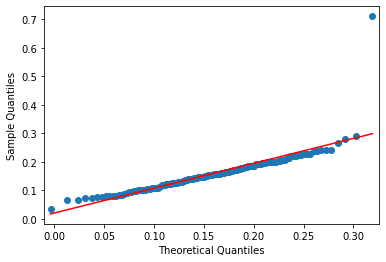

In [4]:
# sns.displot(male_tipr)
fig = qqplot(male_tipr, line='r',
             dist=stats.norm(loc=np.mean(male_tipr),
             scale=np.sqrt(stats.tvar(male_tipr))))

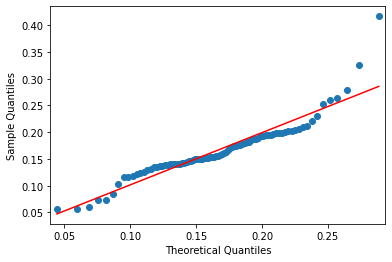

In [5]:
fig = qqplot(female_tipr, line='r',
             dist=stats.norm(loc=np.mean(female_tipr),
             scale=np.sqrt(stats.tvar(female_tipr))))

## シャピロ・ウィルク検定

df

In [7]:
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447847127914429, pvalue=3.2243281107541917e-15)

Ｐ値 が５％以下なので正規分布ではない。

In [14]:
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

Ｐ値が5%以上なので正規分布である、とうことを否定できない。

In [21]:
stats.shapiro(np.sort(female_tipr)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

Ｐ値 が５％以下なので正規分布ではない。

- シャピロ・ウィルクの検定を使う時は、はずれ値に注意する。（必要に応じて取り除いて検定する）
- シャピロ・ウィルクの検定だけ使用して確認するのではなく、Q-Q Plot と合わせて使うことで、より納得いくかたちでその Data の正規性を確認できる。